In [ ]:
# Global Data on Sustainable Energy (2000–2020)
## Student: Diakonov Ivan
## Group: MCF-2026

In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#for ML modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [25]:
# Установить библиотеку kaggle
!pip install kaggle --quiet

# Создать папку для kaggle и переместить туда файл
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# Установить нужные права доступа
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d anshtanwar/global-data-on-sustainable-energy

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/174k [00:00<?, ?B/s]
100% 174k/174k [00:00<00:00, 200MB/s]


In [27]:
# Проверим, что kaggle.json лежит в нужной папке
import os
print(os.path.exists('/root/.kaggle/kaggle.json'))  # Должно вывести: True

True


In [28]:
# Попробуем вывести список датасетов по ключевому слову
!kaggle datasets list -s sustainable-energy

ref                                                               title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
anshtanwar/global-data-on-sustainable-energy                      Global Data on Sustainable Energy (2000-2020)         178251  2023-08-19 05:22:23.343000          22937        246  1.0              
girumwondemagegn/dataset-for-renewable-energy-systems             Dataset for renewable energy systems                  873659  2024-05-17 23:51:25.357000           3702         54  1.0              
natashalondon/sustainable-energy-for-all                          Sustainable Energy For All                            712183  2020-01-07 11:10:02.090000            739         29  0.8235294        


In [29]:
# install kaggle
!pip install kaggle --quiet

# transfer kaggle.json to usable folder
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# download dataset
!kaggle datasets download -d anshtanwar/global-data-on-sustainable-energy

# unzip
import zipfile
with zipfile.ZipFile("global-data-on-sustainable-energy.zip", "r") as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy
License(s): Attribution 4.0 International (CC BY 4.0)
global-data-on-sustainable-energy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
import os
print(os.path.exists('/root/.kaggle/kaggle.json'))


True


In [31]:
!kaggle datasets download -d anshtanwar/global-data-on-sustainable-energy -p /content


Dataset URL: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy
License(s): Attribution 4.0 International (CC BY 4.0)
global-data-on-sustainable-energy.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
import os
print(os.listdir('/content'))


['.config', 'global-data-on-sustainable-energy.zip', 'global-data-on-sustainable-energy (1).csv', 'drive', 'kaggle.json', 'sample_data']


In [33]:
import zipfile

with zipfile.ZipFile('/content/global-data-on-sustainable-energy.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [34]:
print(os.listdir('/content'))


['.config', 'global-data-on-sustainable-energy.zip', 'global-data-on-sustainable-energy (1).csv', 'drive', 'kaggle.json', 'sample_data']


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots (lesson 8)
sns.set(style="whitegrid", palette="pastel")

In [38]:
# Chapter 1. EDA
## Check shape of data

df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')
print("Rows and columns:", df.shape)

df.head()


Rows and columns: (3649, 21)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [39]:
# Show the shape of DataFrame
print("Shape of data (rows, columns):")
print(df.shape)


Shape of data (rows, columns):
(3649, 21)


In [40]:
# Show first 5 rows
print("First 5 rows of data:")
print(df.head())


First 5 rows of data:
        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.7

In [41]:
# Show column names and data types
print("Column names and data types:")
print(df.dtypes)


Column names and data types:
Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)

In [42]:
# Check missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [43]:
# Check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [44]:
# Show descriptive statistics for numeric columns
print("Descriptive statistics for numeric columns:")
print(df.describe())


Descriptive statistics for numeric columns:
              Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.00

In [45]:
# Show median for numeric columns
print("Median for numeric columns:")
print(df.median(numeric_only=True))


Median for numeric columns:
Year                                                                2.010000e+03
Access to electricity (% of population)                             9.836157e+01
Access to clean fuels for cooking                                   8.315000e+01
Renewable-electricity-generating-capacity-per-capita                3.291000e+01
Financial flows to developing countries (US $)                      5.665000e+06
Renewable energy share in the total final energy consumption (%)    2.330000e+01
Electricity from fossil fuels (TWh)                                 2.970000e+00
Electricity from nuclear (TWh)                                      0.000000e+00
Electricity from renewables (TWh)                                   1.470000e+00
Low-carbon electricity (% electricity)                              2.786507e+01
Primary energy consumption per capita (kWh/person)                  1.312057e+04
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         4.300000e+00


In [46]:
# Show skewness for numeric columns
print("Skewness for numeric columns:")
print(df.skew(numeric_only=True))


Skewness for numeric columns:
Year                                                                -0.009142
Access to electricity (% of population)                             -1.205845
Access to clean fuels for cooking                                   -0.508054
Renewable-electricity-generating-capacity-per-capita                 5.366933
Financial flows to developing countries (US $)                       8.388252
Renewable energy share in the total final energy consumption (%)     0.670873
Electricity from fossil fuels (TWh)                                  9.396760
Electricity from nuclear (TWh)                                       8.565198
Electricity from renewables (TWh)                                   11.057606
Low-carbon electricity (% electricity)                               0.506052
Primary energy consumption per capita (kWh/person)                   2.651621
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          2.589086
Value_co2_emissions_kt_by_country 

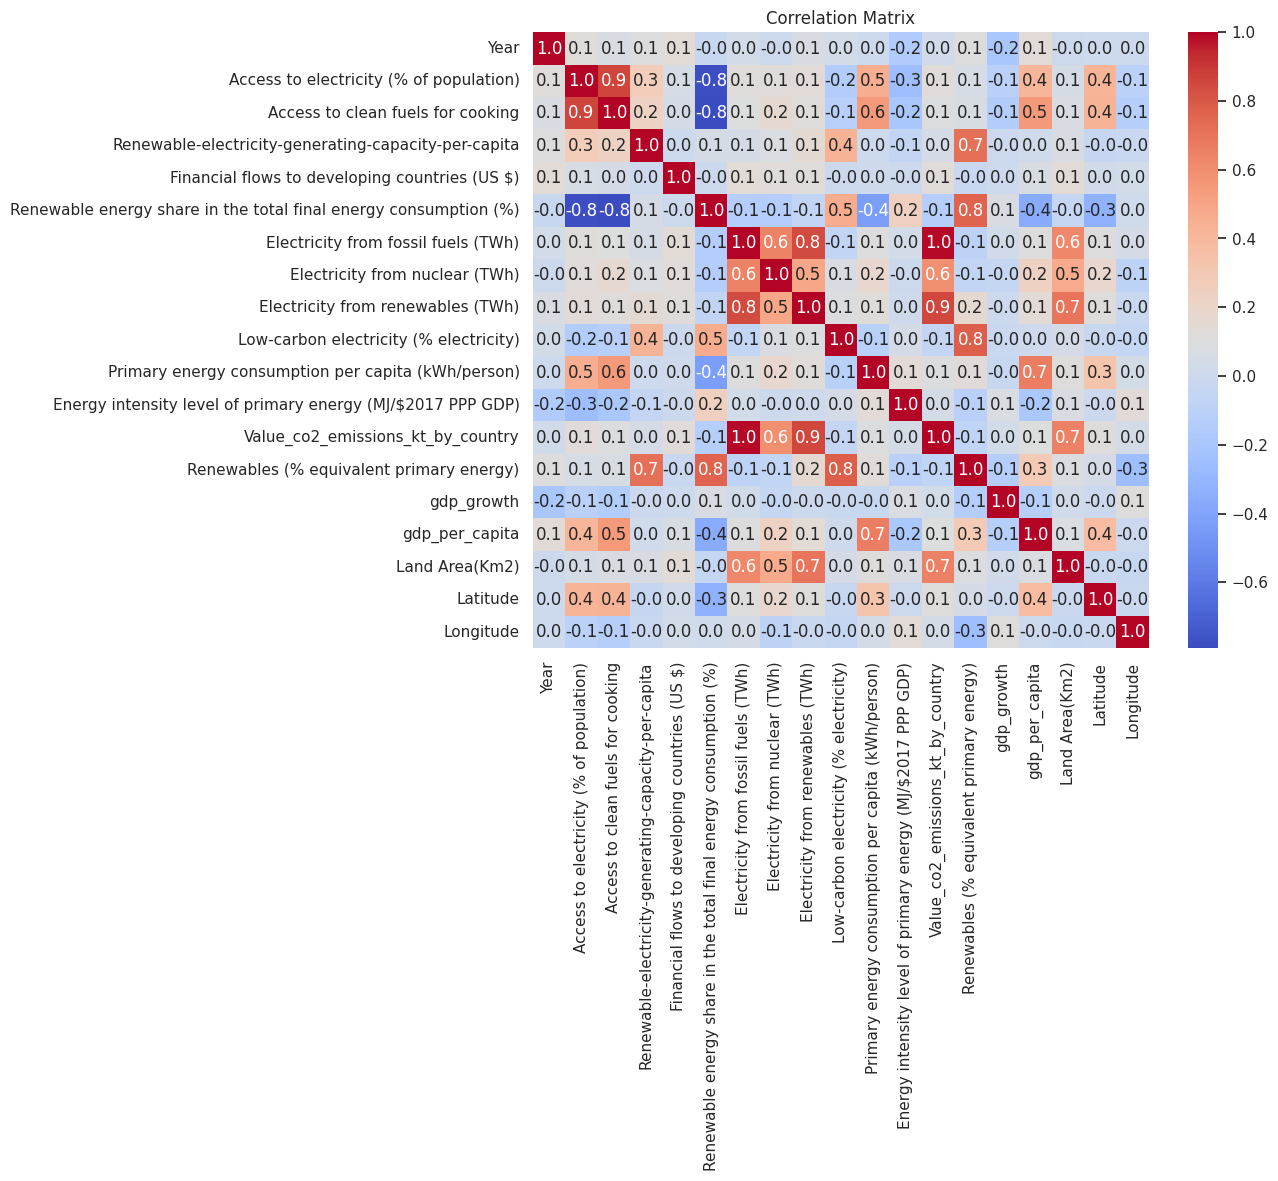

In [47]:

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()



In [49]:
# Negative correlation between the share of renewable energy and fossil fuel consumption. The ratio between the share of renewable energy and electricity from fossil fuels is -0.8. The higher the share of renewable energy, the less dependence on fossil fuels.
# Negative correlation between the share of renewable energy and CO₂ emissions. There is a negative relationship between the share of renewable energy and CO₂ emissions (-0.5). The growth in the share of green energy is associated with a decrease in CO₂ emissions.
# Positive correlation between GDP per capita and CO₂ emissions. Gdp_per_capita and Value_co2_emissions_kt_by_country have a positive correlation (about 0.7). This suggests that economically developed countries emit more CO₂ on average, which is related to the level of industrialization and energy consumption.
# Positive correlation between fossil fuel energy consumption and CO₂ emissions. The coefficient between Electricity from fossil fuels (TWh) and Value_co2_emissions_kt_by_country is close to 1.0. This is to be expected: the more a country uses fossil fuels, the higher its CO₂ emissions.
# Correlation analysis shows that an increase in the share of renewable energy is closely related to a decrease in CO₂ emissions and a decrease in dependence on fossil fuels. Economic development has been accompanied by rising energy consumption and emissions, but the transition to renewable energy can mitigate this effect.

In [50]:
# Chapter 2. Data visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')


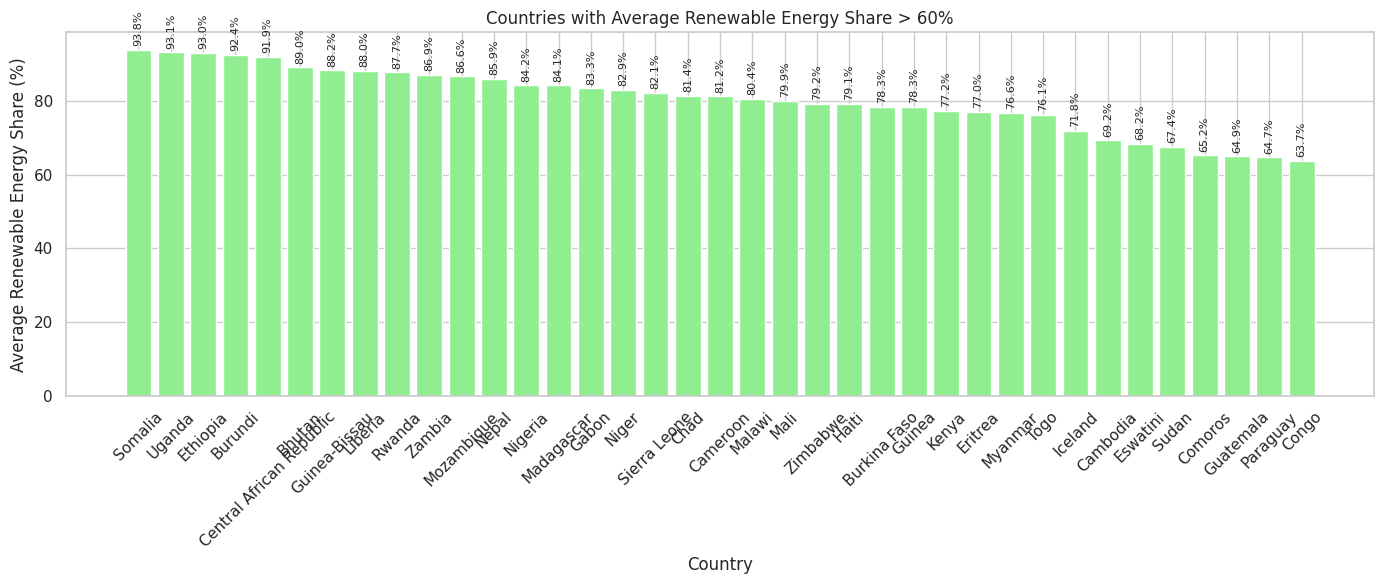

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# Group by country and get mean value
country_mean = df.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()

# Filter countries with mean > 60%
high_renew = country_mean[country_mean > 60].sort_values(ascending=False)

# Make bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(high_renew.index, high_renew.values, color='lightgreen')

# Add value labels
for i, value in enumerate(high_renew.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=8, rotation=90)

plt.xlabel('Country')
plt.ylabel('Average Renewable Energy Share (%)')
plt.title('Countries with Average Renewable Energy Share > 60%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# This picture demonstraites that high level of RES is tupical for third world countries. It relates to their low level of manufacture activity, I suppose. So, lets see the situation in countries, which provides majority of CO2 emission


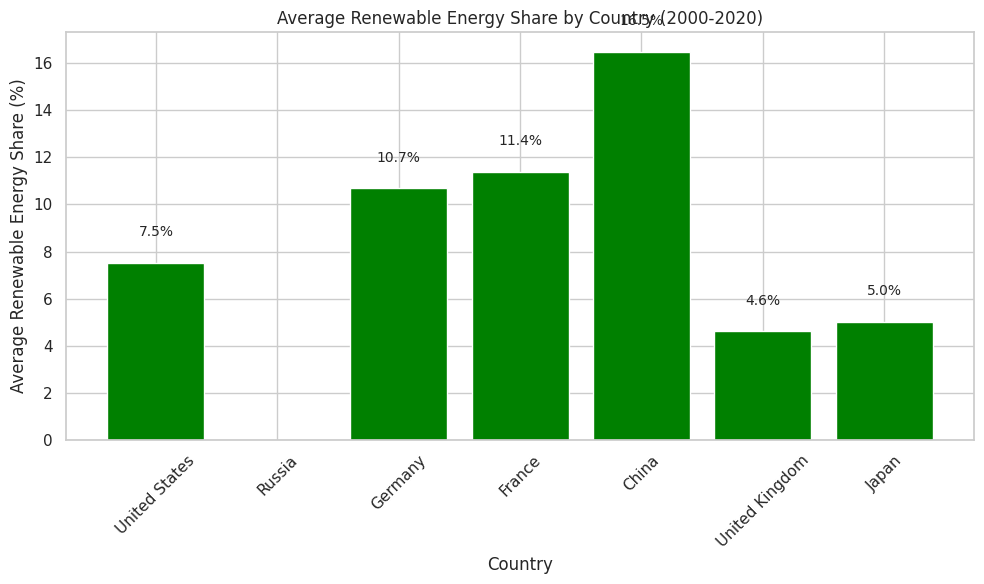

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# List of needed countries
countries = ['United States', 'Russia', 'Germany', 'France', 'China', 'United Kingdom', 'Japan']

# Filter data for selected countries
df_countries = df[df['Entity'].isin(countries)]

# Group by country and calculate mean renewable energy share
mean_renew = df_countries.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean().reindex(countries)

# Make bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_renew.index, mean_renew.values, color='green')

# Add value labels
for i, value in enumerate(mean_renew.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Country')
plt.ylabel('Average Renewable Energy Share (%)')
plt.title('Average Renewable Energy Share by Country (2000-2020)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
# We did not find the data about the Russia, but lets analyse the situation in high developed countries in each region. We see the RES level of 10% and less, exept of Chine with 16%.

In [56]:
import pandas as pd

# Укажи правильный путь к твоему файлу
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# Посмотри все названия столбцов
print(list(df.columns))


['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


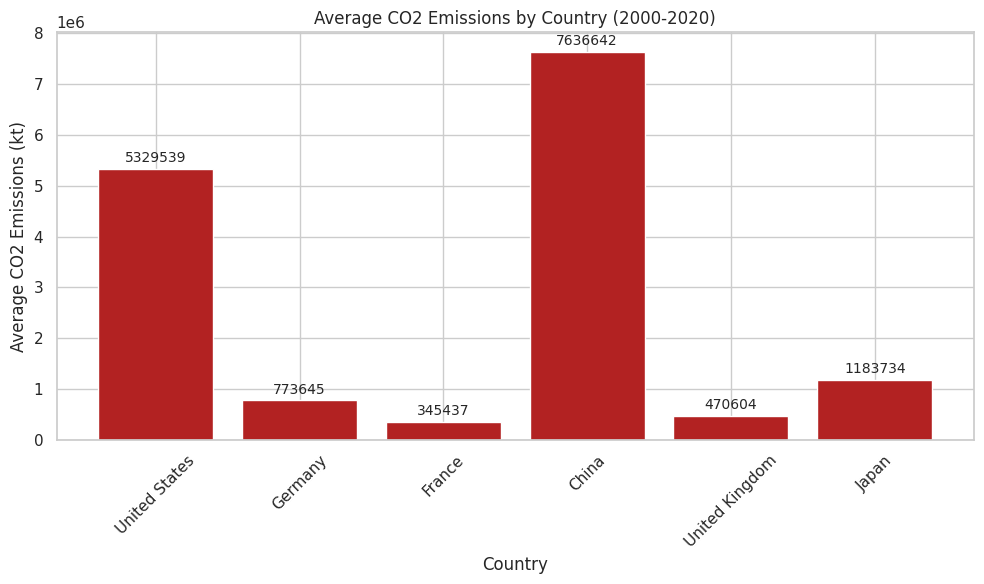

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# List of countries
countries = ['United States', 'Germany', 'France', 'China', 'United Kingdom', 'Japan']

# Filter data for selected countries
df_countries = df[df['Entity'].isin(countries)]

# Group by country and calculate mean CO2 emissions (kt)
mean_co2 = df_countries.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean().reindex(countries)

# Make bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_co2.index, mean_co2.values, color='firebrick')

# Add value labels
for i, value in enumerate(mean_co2.values):
    plt.text(i, value + max(mean_co2.values)*0.01, f'{value:.0f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kt)')
plt.title('Average CO2 Emissions by Country (2000-2020)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
# Absolute lider in the CO2 emisson - The USA and China, who world consumer leader as well.

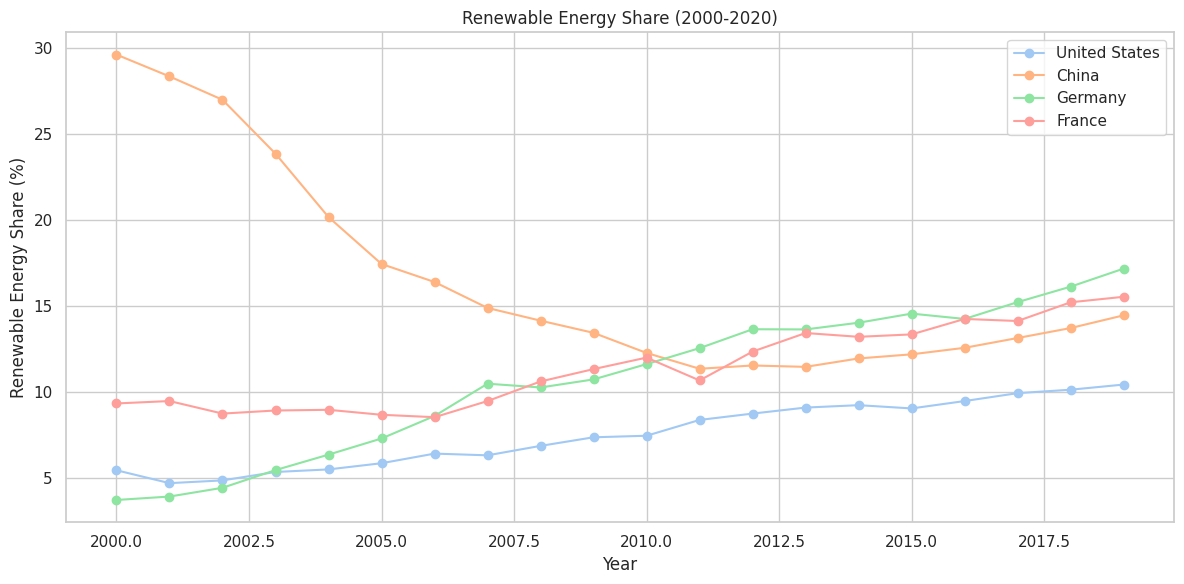

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

countries = ['United States', 'China', 'Germany', 'France']

# filter country by periods
df_trend = df[df['Entity'].isin(countries)]
df_trend = df_trend[(df_trend['Year'] >= 2000) & (df_trend['Year'] <= 2020)]

# create the graph
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_trend[df_trend['Entity'] == country]
    plt.plot(country_data['Year'],
             country_data['Renewable energy share in the total final energy consumption (%)'],
             marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Renewable Energy Share (2000-2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
# In this pic we see the time trends in RES level. For me China plot looks strange from 2000 to 2010. The rest lines grows steadily.

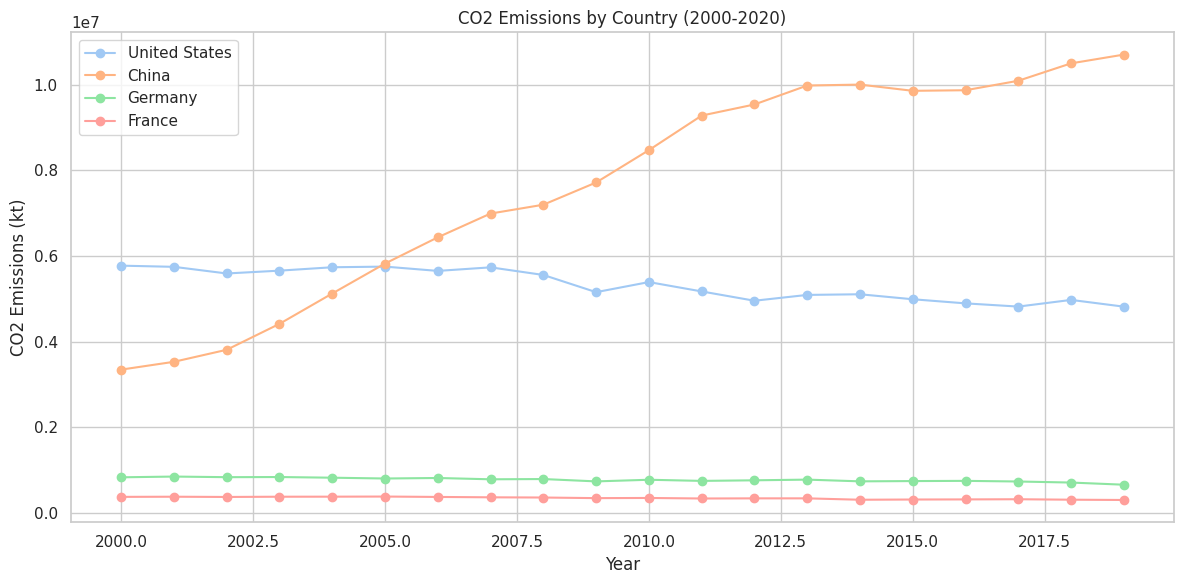

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# List of countries for plot
countries = ['United States', 'China', 'Germany', 'France']

# Filter data for selected countries and years
df_trend = df[df['Entity'].isin(countries)]
df_trend = df_trend[(df_trend['Year'] >= 2000) & (df_trend['Year'] <= 2020)]

# Plot CO2 emissions trend for each country
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_trend[df_trend['Entity'] == country]
    plt.plot(country_data['Year'],
             country_data['Value_co2_emissions_kt_by_country'],
             marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Country (2000-2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
# Lest check the trends the emisson level. In China it grows fast, but the rest countres do not change their level.

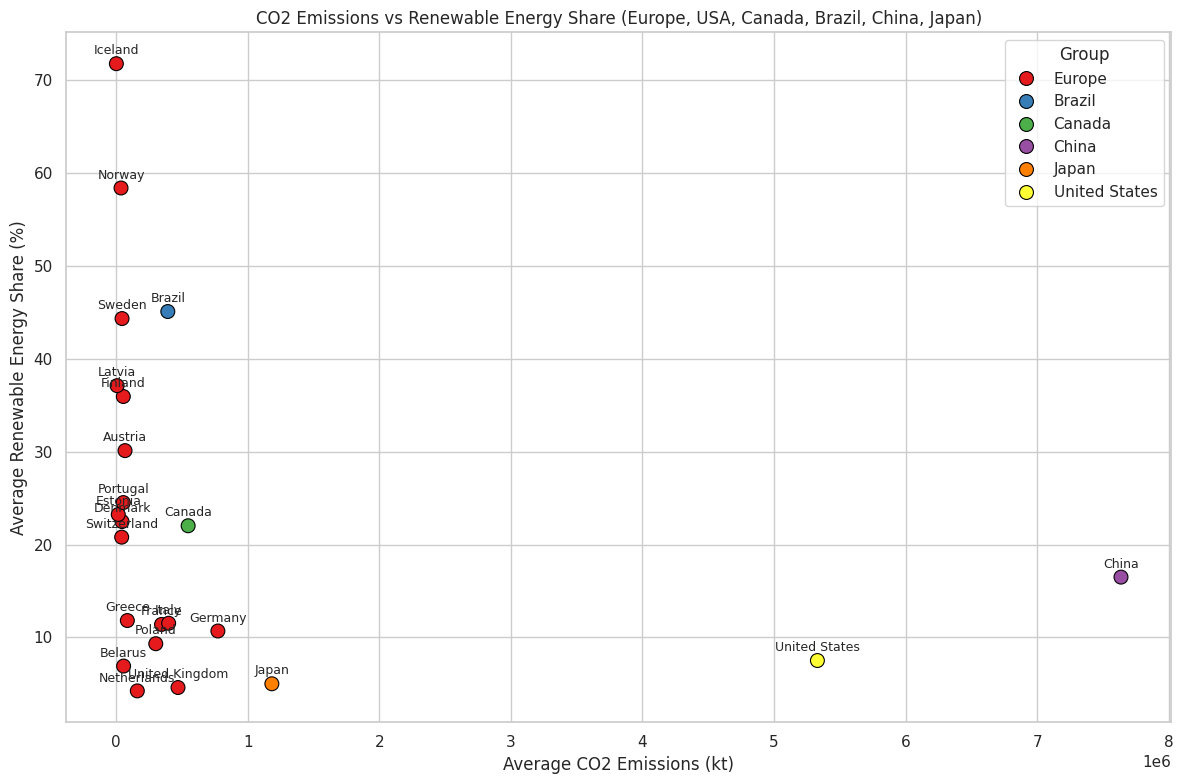

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# download the data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# The least of counties
special_countries = ['United States', 'Canada', 'Brazil', 'China', 'Japan']

# Определим европейские страны по датасету

europe_country_list = [
    'Germany', 'France', 'United Kingdom', 'Italy', 'Poland', 'Netherlands',
    'Sweden', 'Norway', 'Finland', 'Denmark', 'Switzerland', 'Austria', 'Portugal', 'Czech Republic',
    'Greece','Estonia', 'Latvia', 'Iceland', 'Belarus'
]


# filter
df['Group'] = 'Other'
df.loc[df['Entity'].isin(europe_country_list), 'Group'] = 'Europe'
df.loc[df['Entity'].isin(special_countries), 'Group'] = df['Entity']

# mean valus
agg = df.groupby('Entity').agg({
    'Value_co2_emissions_kt_by_country': 'mean',
    'Renewable energy share in the total final energy consumption (%)': 'mean',
    'Group': 'first'
}).reset_index()

# point the targets country
plot_df = agg[(agg['Group'] == 'Europe') | (agg['Entity'].isin(special_countries))]

# create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Value_co2_emissions_kt_by_country',
    y='Renewable energy share in the total final energy consumption (%)',
    hue='Group',
    data=plot_df,
    palette='Set1',
    s=100,
    edgecolor='black'
)

# labled
for i, row in plot_df.iterrows():
    plt.text(row['Value_co2_emissions_kt_by_country'],
             row['Renewable energy share in the total final energy consumption (%)'] + 1,
             row['Entity'],
             fontsize=9, ha='center')

plt.xlabel('Average CO2 Emissions (kt)')
plt.ylabel('Average Renewable Energy Share (%)')
plt.title('CO2 Emissions vs Renewable Energy Share (Europe, USA, Canada, Brazil, China, Japan)')
plt.legend(title='Group')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
# In this scatter plot we can see how countres group in the axes "CO2-RES". China and the USA stand apart.

In [70]:
# Chapter 3. Feature Engineering

import pandas as pd
import numpy as np

# Read data from file
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# 1. Handle missing values: fill NaN in 'Renewable energy share' with column mean
df['Renewable energy share in the total final energy consumption (%)'] = df['Renewable energy share in the total final energy consumption (%)'].fillna(
    df['Renewable energy share in the total final energy consumption (%)'].mean()
)

# 2. Handle missing values: fill NaN in 'Value_co2_emissions_kt_by_country' with 0
df['Value_co2_emissions_kt_by_country'] = df['Value_co2_emissions_kt_by_country'].fillna(0)

# 3. Create new feature: High renewable share (1 if share > 30%, else 0)
df['High_renewable'] = np.where(df['Renewable energy share in the total final energy consumption (%)'] > 30, 1, 0)

# 4. Create new feature: CO2 emission group (bins)
df['CO2_group'] = pd.cut(
    df['Value_co2_emissions_kt_by_country'],
    bins=[-1, 50000, 200000, 1000000, np.inf],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# 5. Show first 5 rows with new features
print(df[['Entity', 'Year', 'Renewable energy share in the total final energy consumption (%)',
          'Value_co2_emissions_kt_by_country', 'High_renewable', 'CO2_group']].head())


        Entity  Year  \
0  Afghanistan  2000   
1  Afghanistan  2001   
2  Afghanistan  2002   
3  Afghanistan  2003   
4  Afghanistan  2004   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Value_co2_emissions_kt_by_country  High_renewable CO2_group  
0                         760.000000               1       Low  
1                         730.000000               1       Low  
2                        1029.999971               1       Low  
3                        1220.000029               1       Low  
4                        1029.999971               1       Low  


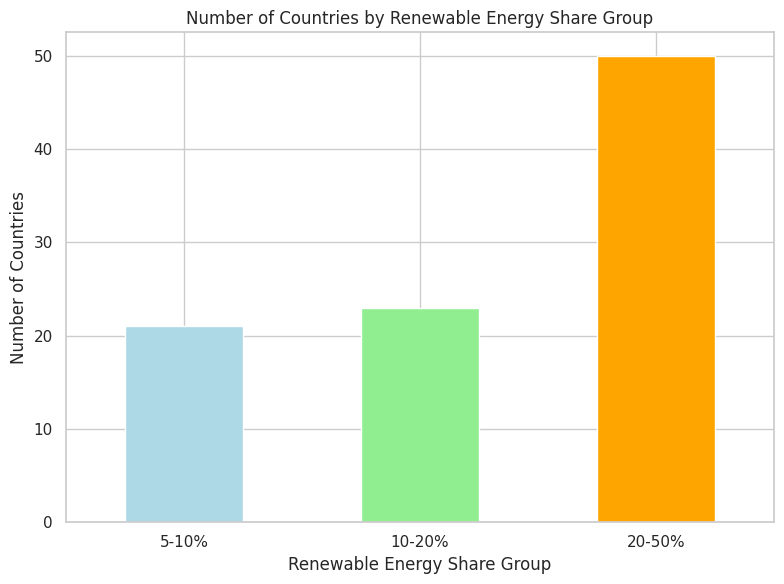


Countries in group 5-10%:
['Argentina', 'Armenia', 'Australia', 'Barbados', 'Belarus', 'Belgium', 'Cyprus', 'Egypt', 'Ireland', 'Israel', 'Jamaica', 'Japan', 'Lebanon', 'Luxembourg', 'Mexico', 'New Caledonia', 'Poland', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Slovakia', 'United States']

Countries in group 10-20%:
['Bulgaria', 'China', 'Czechia', 'Dominica', 'Dominican Republic', 'Ecuador', 'Equatorial Guinea', 'France', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Italy', 'Mauritius', 'Morocco', 'North Macedonia', 'Saint Lucia', 'Serbia', 'Slovenia', 'South Africa', 'Spain', 'Tunisia', 'Turkey']

Countries in group 20-50%:
['Afghanistan', 'Austria', 'Bangladesh', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Denmark', 'Djibouti', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'French Guiana', 'Georgia', 'Guyana', 'India', 'Indonesia', 'Kiribati', 'Kyrgyzstan', 'Latvia', 'Lesotho', 'Lithuan

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
file_path = '/content/global-data-on-sustainable-energy (1).csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# group by countries and count the mean value by share of green energy
country_mean = df.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()

# Group by
bins = [5, 10, 20, 50]
labels = ['5-10%', '10-20%', '20-50%']
country_mean_group = pd.cut(country_mean, bins=bins, labels=labels, right=False)

# Count the total amount contries in each group
group_counts = country_mean_group.value_counts().sort_index()

# create the histogram
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange'])
plt.title('Number of Countries by Renewable Energy Share Group')
plt.xlabel('Renewable Energy Share Group')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Для справки: выводим страны по группам
for group in labels:
    print(f"\nCountries in group {group}:")
    print(country_mean[country_mean_group == group].index.tolist())


In [73]:
# In this plot I wanted to group the magority of counties in RES level. We see, that the minority of counties produse the magority of CO2, becouse this plot shows ut that majotiry countries have really high level of RSE.

In [74]:
# Chapter 4. Model Building

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# Select features and target
# We use only rows without missing values in selected columns
df_model = df[['Renewable energy share in the total final energy consumption (%)',
               'gdp_per_capita',
               'Value_co2_emissions_kt_by_country']].dropna()

X = df_model[['Renewable energy share in the total final energy consumption (%)', 'gdp_per_capita']]
y = df_model['Value_co2_emissions_kt_by_country']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 score:", r2)

# Show first 5 predictions vs real values
results = pd.DataFrame({'Real': y_test.values[:5], 'Predicted': y_pred[:5]})
print(results)


RMSE: 764284.3324230103
R2 score: 0.024545237623120664
           Real      Predicted
0   1759.999990  257014.656153
1   9079.999924    4307.641999
2  43880.001070  206592.057929
3    579.999983  -32911.322760
4  13340.000150  214903.556131


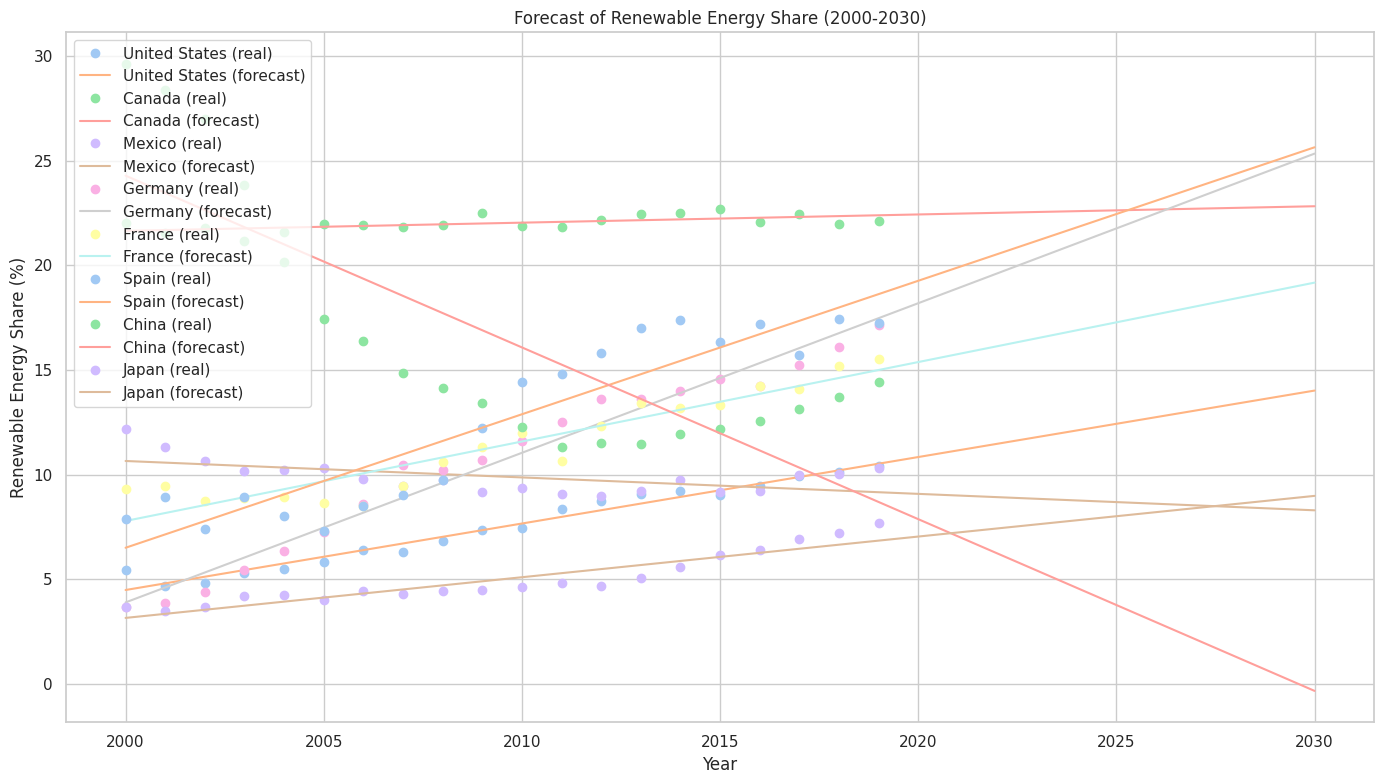

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# List of countries for forecast
countries = ['United States', 'Canada', 'Mexico', 'Germany', 'France', 'Spain', 'China','Japan']

plt.figure(figsize=(14, 8))

for country in countries:
    # Filter data for country and years 2000-2020
    country_data = df[(df['Entity'] == country) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]
    # Remove missing values
    country_data = country_data[['Year', 'Renewable energy share in the total final energy consumption (%)']].dropna()
    if len(country_data) < 5:
        continue  # Skip if not enough data for regression

    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Renewable energy share in the total final energy consumption (%)'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make prediction for years 2000-2030
    years_future = np.arange(2000, 2031).reshape(-1, 1)
    y_pred = model.predict(years_future)

    # Plot real data
    plt.plot(X.flatten(), y, marker='o', linestyle='', label=f'{country} (real)')
    # Plot forecast
    plt.plot(years_future.flatten(), y_pred, linestyle='-', label=f'{country} (forecast)')

plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Forecast of Renewable Energy Share (2000-2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
# in this and next several pictures I try to show the logic of improving the prediction data. So, lenear regression gives the bad data, aspecieally for China

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
degree = 2  # You can try higher degrees like 3 or 4
poly_model = make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression()
)

# Train the model
poly_model.fit(X_train, y_train)

# Evaluate
poly_pred = poly_model.predict(X_test)
poly_r2 = r2_score(y_test, poly_pred)
print(f"Polynomial R² score (degree {degree}): {poly_r2}")


Polynomial R² score (degree 2): 0.0391078118802064


In [80]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge R² score: {ridge_r2}")

# Lasso regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso R² score: {lasso_r2}")


Ridge R² score: 0.024545239883821957
Lasso R² score: 0.02454523773926265


In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest R² score: {rf_r2}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting R² score: {gb_r2}")


Random Forest R² score: 0.058325659187728585
Gradient Boosting R² score: -0.06673692299168121


In [82]:
import numpy as np

# Create transformed features
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

# Add log, square, and other transformations
for feature in X_train.columns:
    X_train_transformed[f'{feature}_log'] = np.log1p(X_train[feature].clip(lower=0.001))
    X_train_transformed[f'{feature}_squared'] = X_train[feature]**2

    X_test_transformed[f'{feature}_log'] = np.log1p(X_test[feature].clip(lower=0.001))
    X_test_transformed[f'{feature}_squared'] = X_test[feature]**2

# Train model with transformed features
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed, y_train)
transformed_pred = model_transformed.predict(X_test_transformed)
transformed_r2 = r2_score(y_test, transformed_pred)
print(f"Transformed features R² score: {transformed_r2}")


Transformed features R² score: 0.05697098236652953


In [83]:
from sklearn.model_selection import GridSearchCV

# Grid search for regularization parameter
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_}")

# Use best model
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
best_r2 = r2_score(y_test, best_pred)
print(f"Best model R² score on test data: {best_r2}")


Best parameters: {'alpha': 100}
Best R² score: 0.01533538248697124
Best model R² score on test data: 0.024545463648124155


y_test shape: 628
y_pred shape: 31


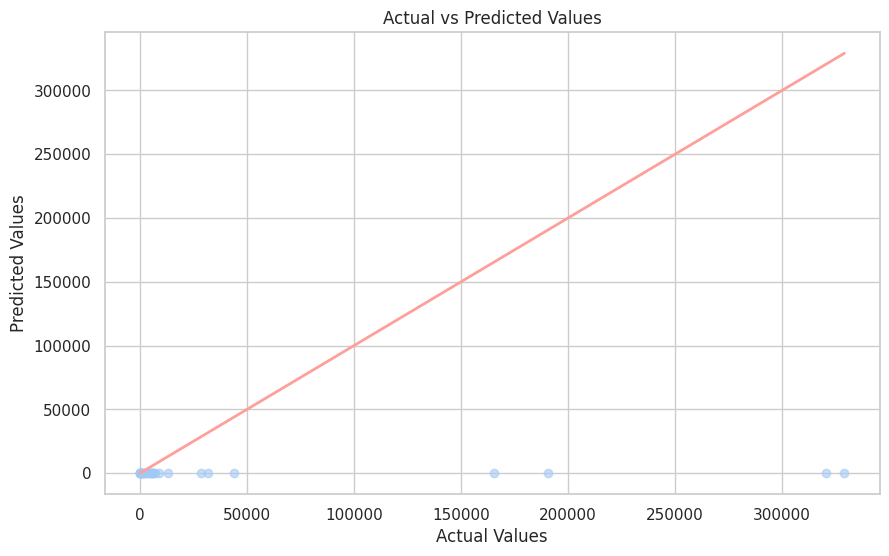

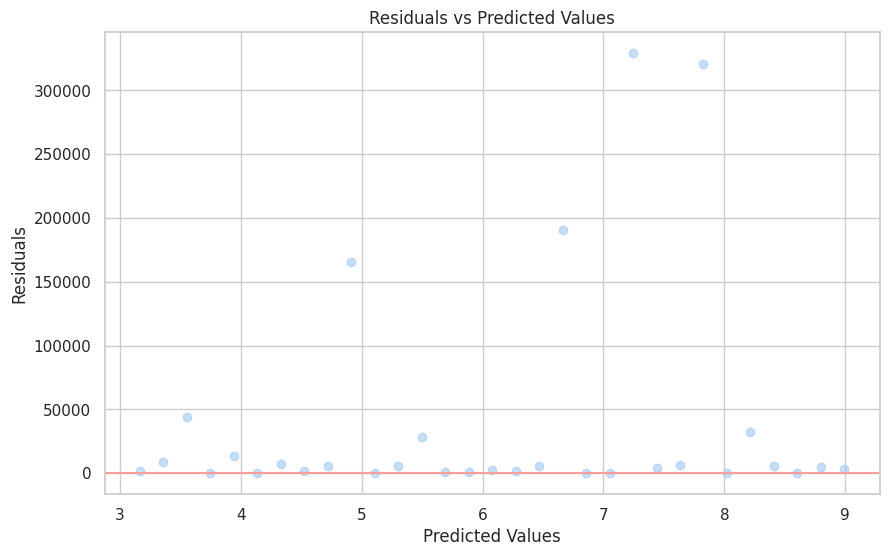

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Check shapes of our arrays
print(f"y_test shape: {len(y_test)}")
print(f"y_pred shape: {len(y_pred)}")

# Fix the length issue - convert to numpy arrays first
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Make sure arrays have same length (use shorter one)
min_length = min(len(y_test_array), len(y_pred_array))
y_test_array = y_test_array[:min_length]
y_pred_array = y_pred_array[:min_length]

# Now create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, y_pred_array, alpha=0.6)
plt.plot([y_test_array.min(), y_test_array.max()],
         [y_test_array.min(), y_test_array.max()],
         'r-', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Also show residuals plot
plt.figure(figsize=(10, 6))
residuals = y_test_array - y_pred_array
plt.scatter(y_pred_array, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [86]:
# we got bad results. so we have to improve the model further

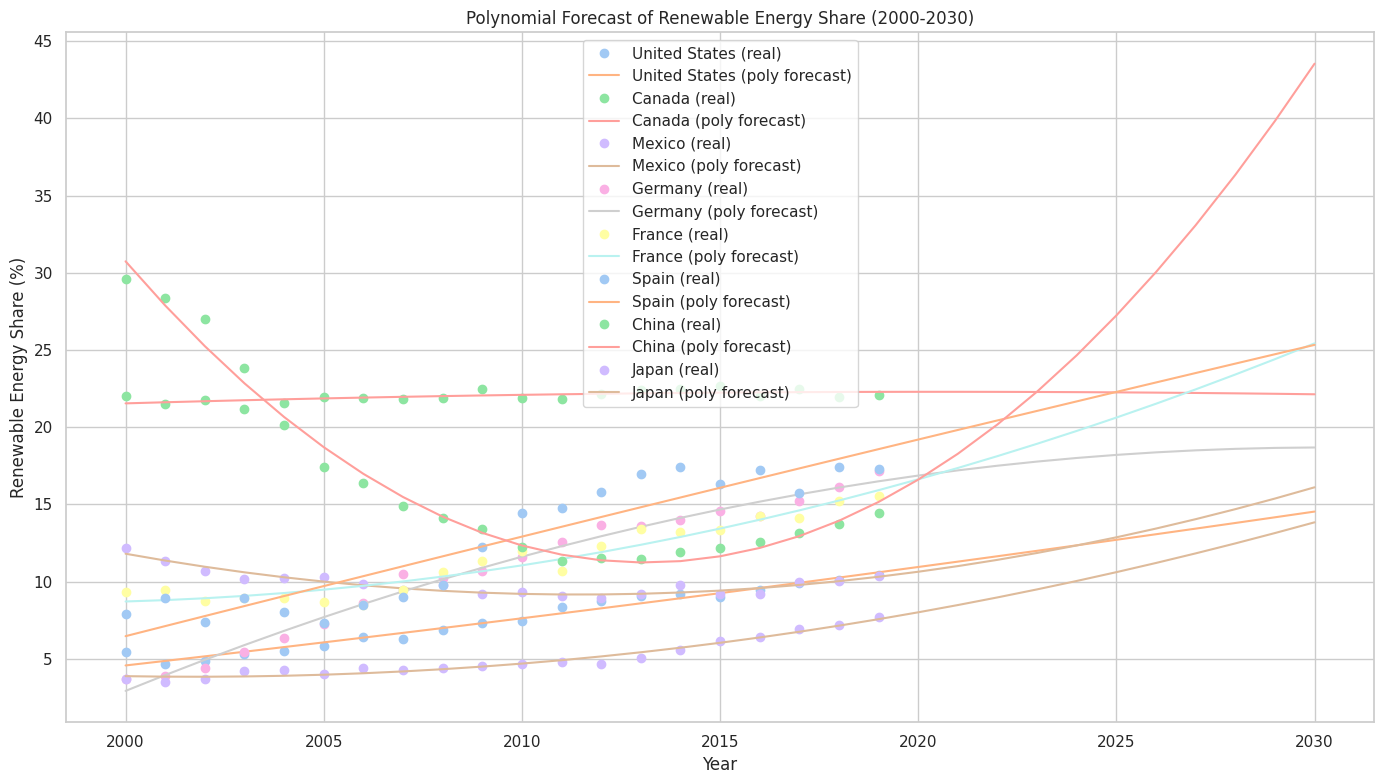

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# List of countries for forecast
countries = ['United States', 'Canada', 'Mexico', 'Germany', 'France', 'Spain', 'China', 'Japan']

plt.figure(figsize=(14, 8))

for country in countries:
    # Filter data for country
    country_data = df[(df['Entity'] == country) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]
    country_data = country_data[['Year', 'Renewable energy share in the total final energy consumption (%)']].dropna()

    if len(country_data) < 5:
        continue

    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Renewable energy share in the total final energy consumption (%)'].values

    # Create polynomial model (degree=2 for quadratic)
    degree = 2
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)

    # Generate prediction years
    years_future = np.arange(2000, 2031).reshape(-1, 1)
    y_pred = poly_model.predict(years_future)

    # Plot real data
    plt.plot(X.flatten(), y, marker='o', linestyle='', label=f'{country} (real)')
    # Plot forecast
    plt.plot(years_future.flatten(), y_pred, linestyle='-', label=f'{country} (poly forecast)')

plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Polynomial Forecast of Renewable Energy Share (2000-2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
# polinomial model did not improve our model enough

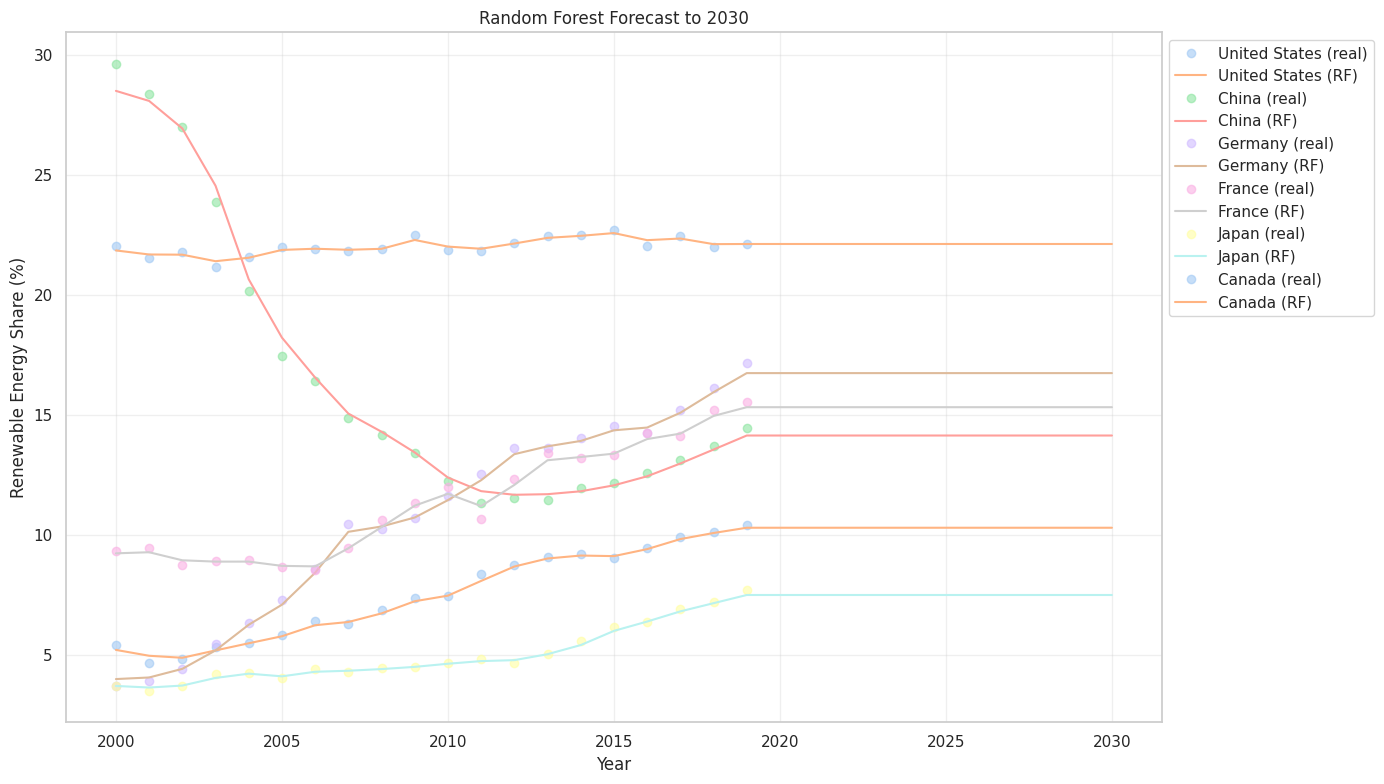

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# List of countries
countries = ['United States', 'China', 'Germany', 'France', 'Japan', 'Canada']

# Create plot
plt.figure(figsize=(14, 8))

for country in countries:
    # Get data for this country
    country_data = df[(df['Entity'] == country) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]
    country_data = country_data[['Year', 'Renewable energy share in the total final energy consumption (%)']].dropna()

    if len(country_data) < 5:
        continue

    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Renewable energy share in the total final energy consumption (%)'].values

    # Create Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X, y)

    # Years for prediction
    years_future = np.arange(2000, 2031).reshape(-1, 1)
    y_pred = rf_model.predict(years_future)

    # Plot real and predicted values
    plt.plot(X.flatten(), y, marker='o', linestyle='', alpha=0.6, label=f'{country} (real)')
    plt.plot(years_future.flatten(), y_pred, linestyle='-', label=f'{country} (RF)')

plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Random Forest Forecast to 2030')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
# There is the bad result in RanfomForest plot, becose it has flat in dorecasting period.

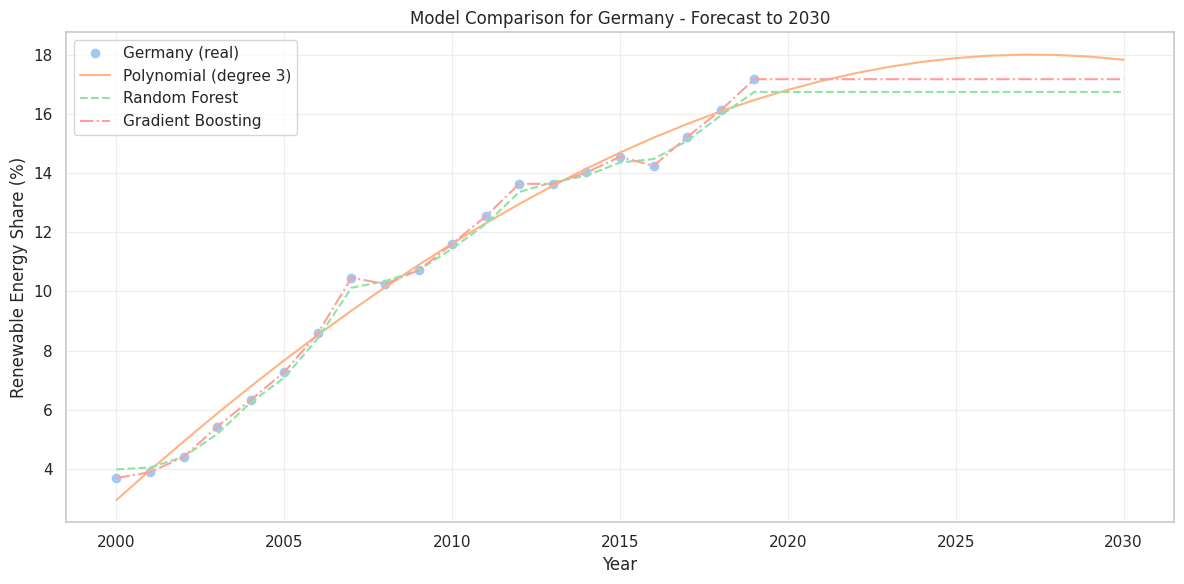

In [106]:
from sklearn.metrics import mean_squared_error

# Choose one country for comparison
country = 'Germany'
country_data = df[(df['Entity'] == country) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]
country_data = country_data[['Year', 'Renewable energy share in the total final energy consumption (%)']].dropna()

X = country_data['Year'].values.reshape(-1, 1)
y = country_data['Renewable energy share in the total final energy consumption (%)'].values

# Create models
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
poly_model.fit(X, y)
rf_model.fit(X, y)
gb_model.fit(X, y)

# Make predictions
years_future = np.arange(2000, 2031).reshape(-1, 1)
poly_pred = poly_model.predict(years_future)
rf_pred = rf_model.predict(years_future)
gb_pred = gb_model.predict(years_future)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(X.flatten(), y, marker='o', linestyle='', label=f'{country} (real)')
plt.plot(years_future.flatten(), poly_pred, linestyle='-', label='Polynomial (degree 3)')
plt.plot(years_future.flatten(), rf_pred, linestyle='--', label='Random Forest')
plt.plot(years_future.flatten(), gb_pred, linestyle='-.', label='Gradient Boosting')

plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title(f'Model Comparison for {country} - Forecast to 2030')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

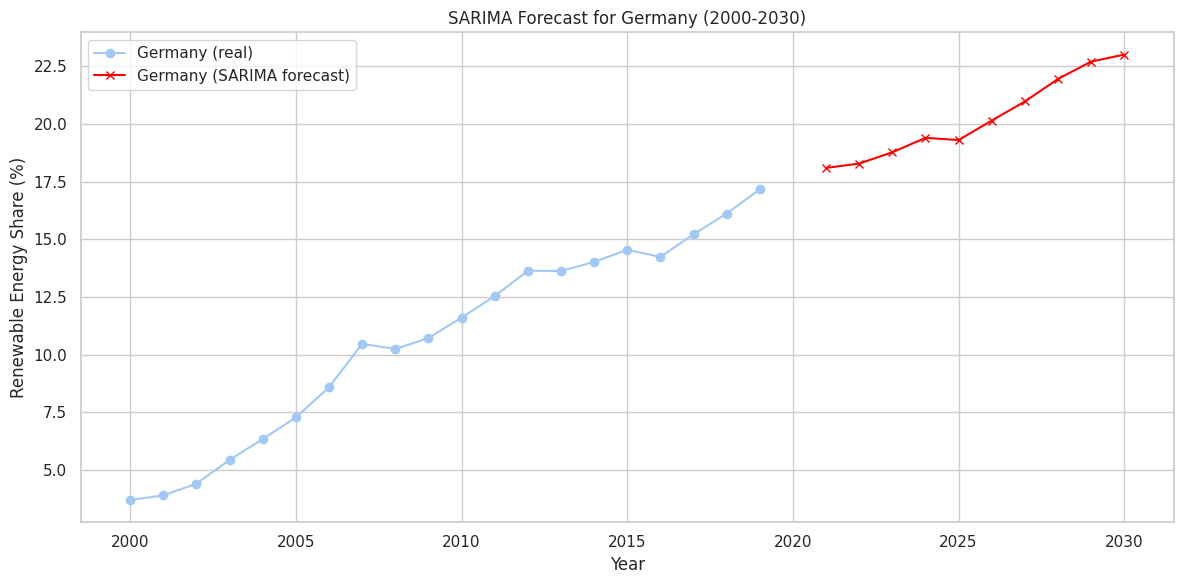

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read data
df = pd.read_csv('/content/global-data-on-sustainable-energy (1).csv', encoding='ISO-8859-1')

# Choose country for example (можно заменить на любую из твоего списка)
country = 'Germany'
country_data = df[(df['Entity'] == country) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]
country_data = country_data[['Year', 'Renewable energy share in the total final energy consumption (%)']].dropna()
country_data = country_data.set_index('Year')

# Fit SARIMA model
model = SARIMAX(country_data, order=(1,1,1), seasonal_order=(1,1,0,4))
result = model.fit(disp=False)

# Forecast for 2021-2030
forecast_steps = 10
forecast = result.forecast(steps=forecast_steps)
forecast_years = np.arange(2021, 2021 + forecast_steps)

# forecast
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data.values, marker='o', label=f'{country} (real)')
plt.plot(forecast_years, forecast.values, marker='x', color='red', label=f'{country} (SARIMA forecast)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title(f'SARIMA Forecast for {country} (2000-2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# To find the appropriate forecasting data I chose Germany and create the SARIMA model.